In [10]:
import os
import pandas as pd
import json

# folder_path = r'E:\code\104ETL\result'
folder_path = os.getcwd()
print(folder_path)
files = os.listdir(folder_path)

e:\code\104ETL\result


In [11]:
job_quantity = {}
salary_dict = {
    '全部地區' : {'未滿30000': 0,
                '30000~39999': 0,
                '40000~49999': 0,
                '50000~59999': 0,
                '60000~69999': 0,
                '70000以上': 0}
}
detail_salary_dict = {}
language_dict = {}
language_counts_dict = {}
tools_dict = {}
skills_dict = {}


In [12]:
# 篩選符合條件的文件
csv_files = [file for file in files if file.startswith('104')]

# 解析每個文件
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    dataframe = pd.read_csv(file_path)
    # 提取工作地點
    location = csv_file.split(" ")[0][3:]
    # 計算職缺數量
    job_quantity[location] = dataframe.shape[0]

    lan_count = 0
    tool_count = 0
    skill_count = 0
    
    # 初始化 salary_dict[location]
    if location not in salary_dict:
        salary_dict[location] = {'未滿30000': 0, 
                                 '30000~39999': 0, 
                                 '40000~49999': 0, 
                                 '50000~59999': 0, 
                                 '60000~69999': 0, 
                                 '70000以上': 0, 
                                 }
        
    if location not in detail_salary_dict:
        detail_salary_dict[location] = {'avg' : 0, 'med' : 0, 'var' : 0, 'std' : 0}
    detail_salary_dict[location]['avg'] = dataframe['工作待遇'].mean()
    detail_salary_dict[location]['med'] = dataframe['工作待遇'].median()
    detail_salary_dict[location]['std'] = dataframe['工作待遇'].std()
    detail_salary_dict[location]['var'] = dataframe['工作待遇'].var()

    # 初始化 language_dict[location]
    if location not in language_dict:
        language_dict[location] = {}
    if location not in language_counts_dict:
        language_counts_dict[location] = {}

    # 初始化 tools_dict[location]
    if location not in tools_dict:
        tools_dict[location] = {}

    # 初始化 skills_dict[location]
    if location not in skills_dict:
        skills_dict[location] = {}

    # 遍歷每一行數據
    for _, row in dataframe.iterrows():
        salary = row['工作待遇']
        language = row['語文條件']
        tools = row['擅長工具要求']
        skills = row['工作技能']
        
        # 處理薪資
        if salary <= 29999:
            salary_dict[location]['未滿30000'] += 1
            salary_dict['全部地區']['未滿30000'] += 1
        elif salary <= 39999:
            salary_dict[location]['30000~39999'] += 1
            salary_dict['全部地區']['30000~39999'] += 1
        elif salary <= 49999:
            salary_dict[location]['40000~49999'] += 1
            salary_dict['全部地區']['40000~49999'] += 1
        elif salary <= 59999:
            salary_dict[location]['50000~59999'] += 1
            salary_dict['全部地區']['50000~59999'] += 1
        elif salary <= 69999:
            salary_dict[location]['60000~69999'] += 1
            salary_dict['全部地區']['60000~69999'] += 1
        elif salary >= 70000:
            salary_dict[location]['70000以上'] += 1
            salary_dict['全部地區']['70000以上'] += 1

        # 處理語文條件
        if language == '不拘':
            if '不拘' not in language_dict[location]:
                language_dict[location]['不拘'] = 1
            else:
                language_dict[location]['不拘'] += 1

            if '不拘' not in language_counts_dict[location]:
                language_counts_dict[location]['不拘'] = 1
            else:
                language_counts_dict[location]['不拘'] += 1
        else:
            lan_count += 1
            try:
                # 替換單引號為雙引號以符合 JSON 標準
                language = language.replace("'", '"')
                language_list = json.loads(language)
                for lang in language_list:
                    lang_name = lang['Language']
                    if lang_name not in language_counts_dict[location]:
                        language_counts_dict[location][lang_name] = 1
                    else:
                        language_counts_dict[location][lang_name] += 1

                    if lang_name not in language_dict[location]:
                        language_dict[location][lang_name] = {'聽': {}, '說': {}, '讀': {}, '寫': {}}
                    for skill in ['Listen', 'Speak', 'Read', 'Write']:
                        skill_chinese = {'Listen': '聽', 'Speak': '說', 'Read': '讀', 'Write': '寫'}
                        skill_level = lang[skill]
                        if skill_level not in language_dict[location][lang_name][skill_chinese[skill]]:
                            language_dict[location][lang_name][skill_chinese[skill]][skill_level] = 1
                        else:
                            language_dict[location][lang_name][skill_chinese[skill]][skill_level] += 1
            except json.JSONDecodeError:
                print(f"Error decoding JSON for language field: {language}")
        
        # 處理擅長工具要求
        tools = tools.split("、")
        for tool in tools:
            if tool != '不拘':
                if tool not in tools_dict[location]:
                    tools_dict[location][tool] = 1
                else:
                    tools_dict[location][tool] += 1

        # 處理工作技能
        skills = skills.split("、")
        for skill in skills:
            if skill != '不拘':
                if skill not in skills_dict[location]:
                    skills_dict[location][skill] = 1
                else:
                    skills_dict[location][skill] += 1

    # 條件要求數量總計
    language_dict[location]['語言要求總計'] = lan_count
    # tools_dict[location]['工具要求總計'] = tool_count
    # skills_dict[location]['技能要求總計'] = skill_count
        

In [13]:
job_quantity = dict(sorted(job_quantity.items(), key= lambda x:x[1], reverse=True))

salary_dict = dict(sorted(salary_dict.items(), key=lambda x: sum(x[1].values()), reverse=True))

language_dict = dict(sorted(language_dict.items(), key=lambda x: x[1]['語言要求總計'], reverse=True))

In [14]:
tools_dict = dict(sorted(tools_dict.items(), key=lambda x: sum(x[1].values()), reverse=True))
for key, value in tools_dict.items():
    print(f"{key}:")
    print(f"{value}")

台北市:
{'C#': 52, 'Java': 81, 'Python': 241, 'PL/SQL': 29, 'MySQL': 112, 'Excel': 77, 'Outlook': 14, 'Word': 50, '中文打字20~50': 2, '英文打字20~50': 1, 'Linux': 121, 'Git': 91, 'hadoop': 29, 'AWS': 68, 'Hive': 11, 'MS SQL': 134, 'Data Modeling': 14, 'ETL': 64, 'PostgreSQL': 66, 'Tableau': 49, 'Power BI': 45, 'R': 21, 'PowerPoint': 61, 'Informatica': 13, 'Oracle': 50, 'Github': 42, 'Informix': 1, 'Teradata': 5, 'Apache SOAP': 1, 'Shell': 20, 'JavaScript': 99, 'ASP.NET': 27, 'NLP': 1, 'LLM': 1, 'Google Data Studio': 13, 'Django': 8, 'OOP': 9, 'HTML': 59, 'XML': 7, 'CSS': 50, 'Google Analytics': 47, 'C': 11, 'Windows Server 2019': 4, 'Cognos': 2, 'OLAP': 7, 'Data Architect': 8, 'Data Marts': 7, 'scikit-learn': 1, 'Keras': 3, 'PyTorch': 5, 'tensorflow': 4, 'Go': 19, 'PHP': 27, 'DataStage': 8, 'Scala': 5, 'Database Administrator': 6, 'Database Management': 15, 'RDBMS': 13, 'ArcGis': 6, 'GIS': 7, 'Windows Server 2008': 1, 'Windows Server 2012': 1, 'DB2': 2, 'Windows 2003': 1, 'SAP': 5, 'UNIX': 3, 'Sy

In [15]:
skills_dict = dict(sorted(skills_dict.items(), key=lambda x: sum(x[1].values()), reverse=True))
for key, value in skills_dict.items():
    print(f"{key}:")
    print(f"{value}")

台北市:
{'規劃': 10, '組織': 10, '指導及協調組織內部行政作業': 10, '部門人力成本控制': 11, '預算編製與成本控管': 12, '專案人力資源管理': 14, '專案成本╱品質╱風險管理': 20, '專案時間╱進度控管': 40, '專案採購管理': 10, '專案規劃執行╱範圍管理': 36, '專案溝通╱整合管理': 41, '專案管理架構及專案說明': 32, '工作任務╱業績項目分配': 17, '培育人員職涯發展': 11, '業績目標達成': 14, '督導人員工作績效': 12, '危機與議題管理': 17, '協商談判能力': 14, '部門績效目標管理': 12, '資料庫系統管理維護': 80, '資料庫程式設計': 114, '系統整合分析': 79, '軟體程式設計': 193, '資料庫軟體應用': 84, 'Machine Learning': 33, '文書處理軟體操作': 5, '簡報軟體操作': 3, '模組化系統設計': 27, '結構化程式設計': 27, '系統架構規劃': 84, '軟體工程系統開發': 127, '網路程式設計': 53, '問題追蹤處理(Bug tracking)': 21, '系統架構規劃與維護': 21, 'AI': 5, '軟體品質與保證': 18, '網路資料傳輸': 4, '資料通訊與網路應用': 2, '功能測試(function test)': 19, '軟體整合測試': 25, '網頁語法撰寫': 15, '伺服器網站管理維護': 30, '資訊設備環境設定': 21, '企業資源規劃管理(ERP)': 6, '專案管理軟體操作': 5, '數據分析': 11, '機器學習': 5, '深度學習': 4, '演算法設計': 3, '資料備份與復原': 19, '運輸規劃': 1, '都市計畫研究調查與管理': 1, '都市計畫規劃分析與設計': 1, '作業系統基本操作': 22, '安裝與維護網路安全系統': 9, '網路系統配置': 8, '人工智慧': 2, '系統維護操作': 20, '行政事務處理': 3, '文件或資料輸入建檔處理': 2, '庶務採購管理與策略規劃': 1, '採購並維護辦公事物及庶務用品': 1, '電腦設備裝配': 4, 

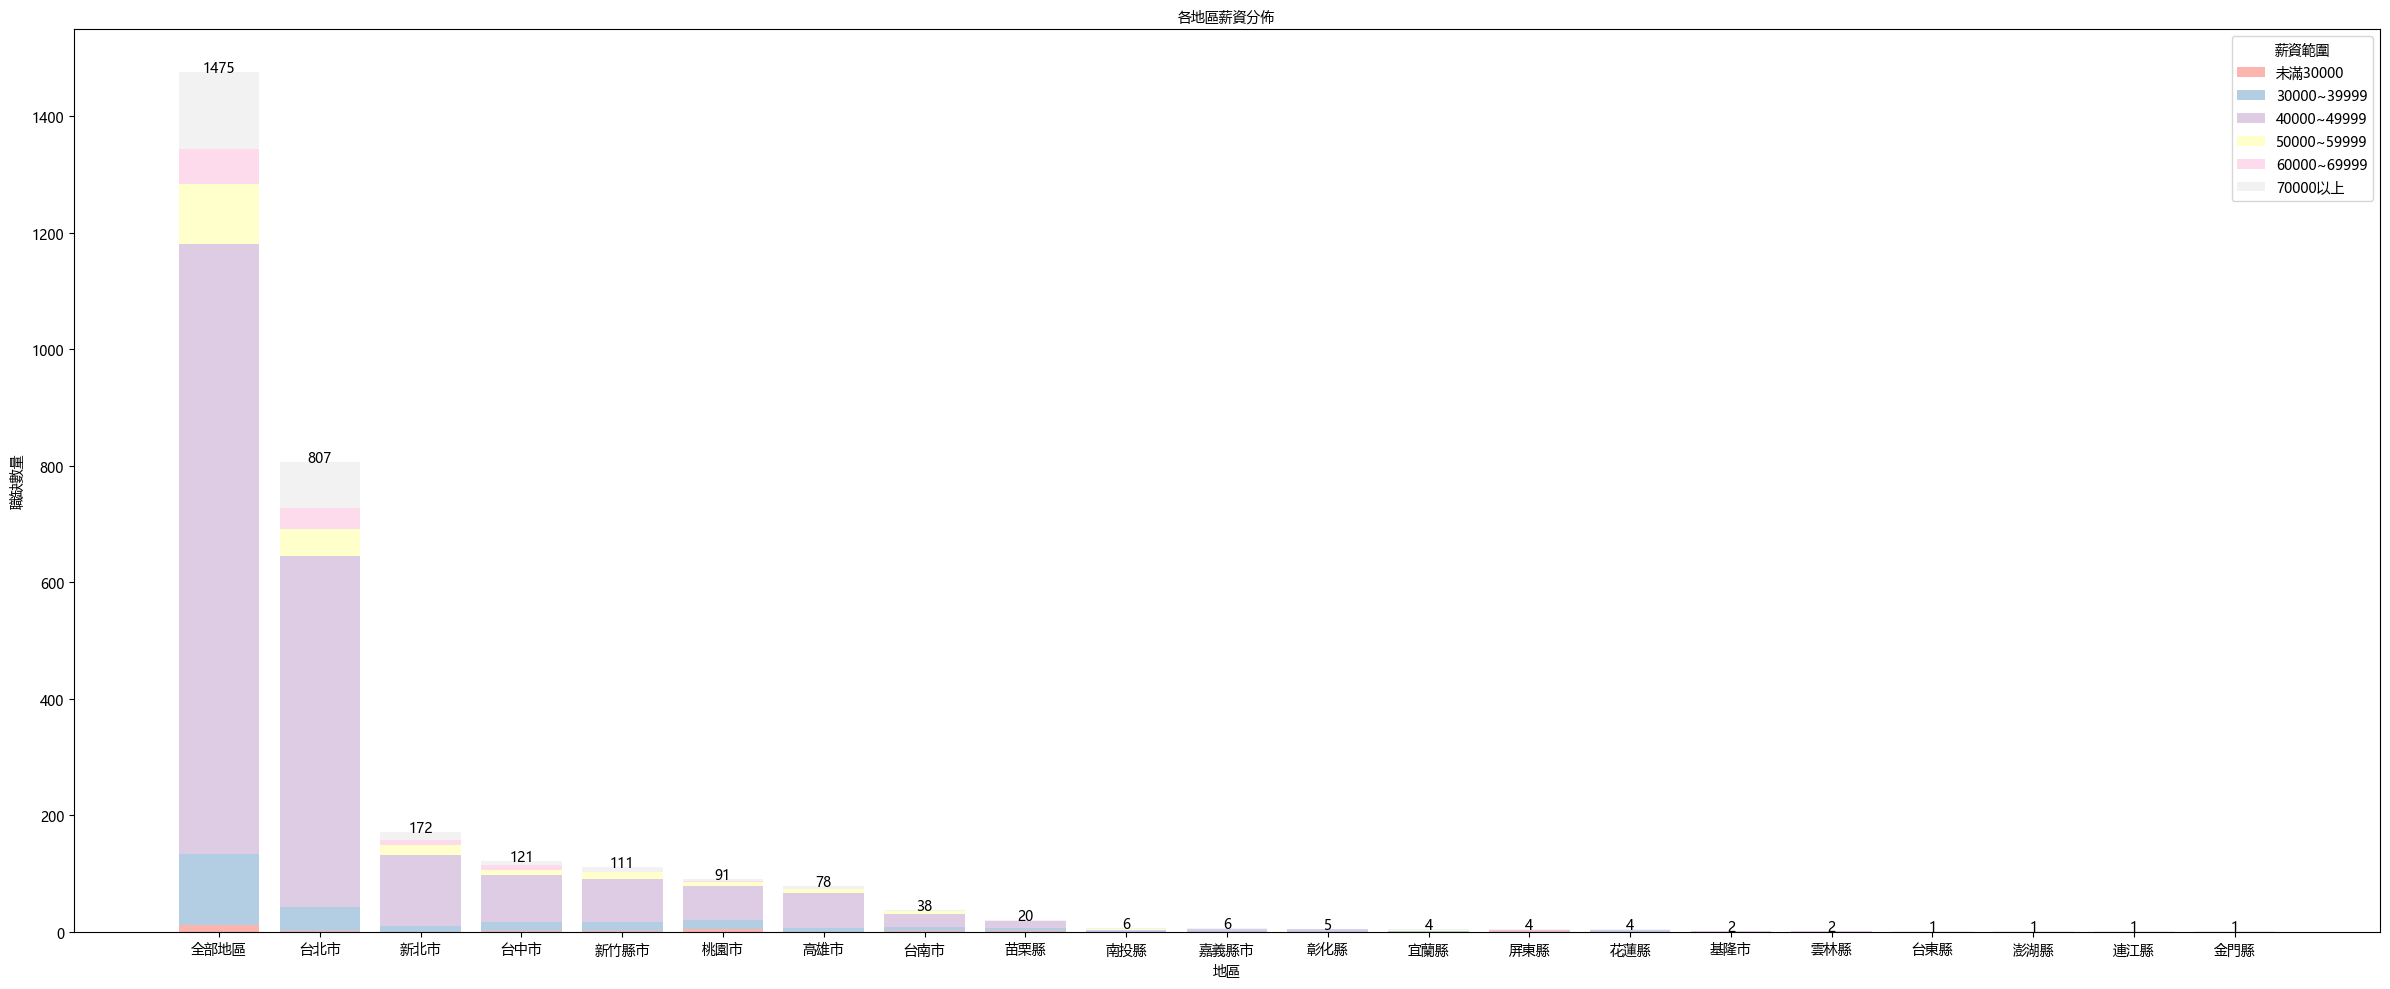

In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.cm as cm

# 設置字體
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 微軟雅黑
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

def plot_salary_distribution(salary_dict, city_group=False):
    if city_group:
        locations = city_group
        figsize = (12, 10)
    else:
        locations = list(salary_dict.keys())
        figsize = (24, 10)
    
    salary_ranges = list(salary_dict[locations[0]].keys())
    
    # 按照每個地區的總職缺數量進行排序
    total_job_counts = {loc: sum(salary_dict[loc].values()) for loc in locations}
    sorted_locations = sorted(locations, key=lambda loc: total_job_counts[loc], reverse=True)
    
    salary_data = {salary_range: [salary_dict[loc][salary_range] for loc in sorted_locations] for salary_range in salary_ranges}
    
    # 使用colormap來生成漸進顏色
    colors = cm.Pastel1(np.linspace(0, 1, len(salary_ranges)))
    # print(colors)
    x = np.arange(len(sorted_locations))  # the label locations
    width = 0.8  # the width of the bars
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # 堆疊柱狀圖
    bottom = np.zeros(len(sorted_locations))
    for i, (salary_range, data) in enumerate(salary_data.items()):
        ax.bar(x, data, width, label=salary_range, bottom=bottom, color=colors[i])
        bottom += np.array(data)
    
    # 添加共計數字
    for i in range(len(sorted_locations)):
        total = sum(salary_dict[sorted_locations[i]].values())
        ax.text(x[i], total, f"{total}", ha='center', fontproperties=font_prop)
    
    # 添加標籤和標題
    ax.set_xlabel('地區', fontproperties=font_prop)
    ax.set_ylabel('職缺數量', fontproperties=font_prop)
    ax.set_title('各地區薪資分佈', fontproperties=font_prop)
    ax.set_xticks(x)
    ax.set_xticklabels(sorted_locations, fontproperties=font_prop)
    ax.legend(title='薪資範圍', prop=font_prop)
    
    fig.tight_layout()
    plt.show()

plot_salary_distribution(salary_dict)


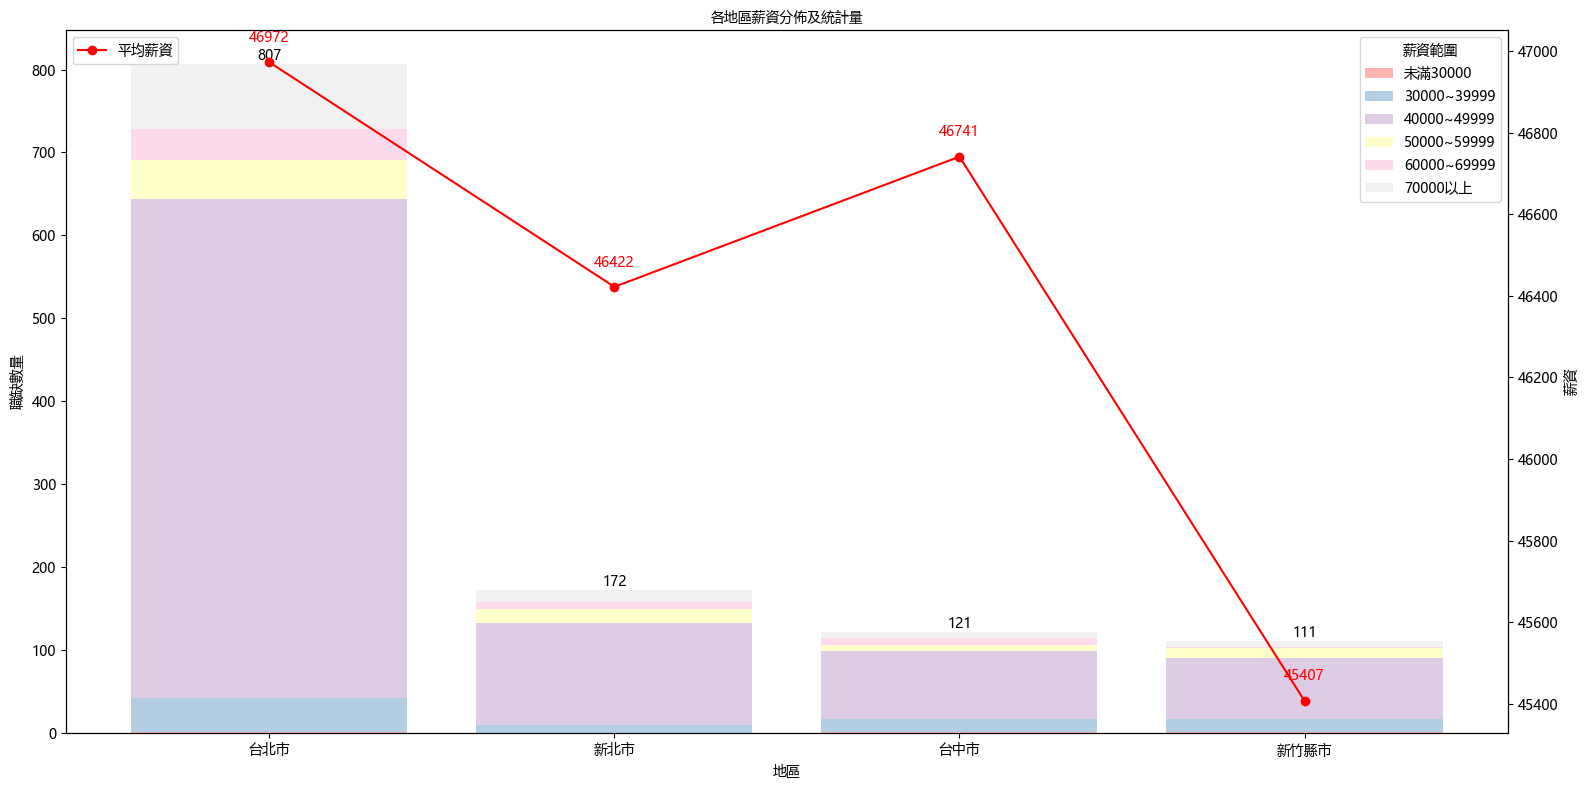

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.cm as cm

# 設置字體
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 微軟雅黑
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

def plot_salary_statistics(salary_dict, detail_salary_dict):
    locations = list(salary_dict.keys())[1:5]
    salary_ranges = list(salary_dict[locations[0]].keys())
    
    # 按照每個地區的總職缺數量進行排序
    total_job_counts = {loc: sum(salary_dict[loc][sr] for sr in salary_ranges) for loc in locations}
    sorted_locations = sorted(locations, key=lambda loc: total_job_counts[loc], reverse=True)
    
    salary_data = {sr: [salary_dict[loc][sr] for loc in sorted_locations] for sr in salary_ranges}
    
    # 計算每個地區的平均薪資和中位數
    average_salaries = [detail_salary_dict[loc]['avg'] for loc in sorted_locations]
    # median_salaries = [detail_salary_dict[loc]['med'] for loc in sorted_locations]
    
    # 使用colormap來生成漸進顏色
    colors = cm.Pastel1(np.linspace(0, 1, len(salary_ranges)))
    
    x = np.arange(len(sorted_locations))  # the label locations
    width = 0.8  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # 堆疊柱狀圖
    bottom = np.zeros(len(sorted_locations))
    for i, (salary_range, data) in enumerate(salary_data.items()):
        ax.bar(x, data, width, label=salary_range, bottom=bottom, color=colors[i])
        bottom += np.array(data)
    
    # 添加共計數字，顯示在柱狀圖頂部
    for i in range(len(sorted_locations)):
        total = sum(salary_dict[sorted_locations[i]][sr] for sr in salary_ranges)
        ax.text(x[i], total + 5, f"{total}", ha='center', fontproperties=font_prop)  # 將位置稍微向上移動
    
    # 添加平均薪資和中位數折線圖
    ax2 = ax.twinx()
    ax2.plot(x, average_salaries, color='r', marker='o', label='平均薪資')
    # ax2.plot(x, median_salaries, color='b', marker='s', linestyle='--', label='中位數薪資')
    ax2.set_ylabel('薪資', fontproperties=font_prop)
    
    for i in range(len(sorted_locations)):
        ax2.text(x[i], average_salaries[i] + 40, f"{average_salaries[i]:.0f}", ha='center', va='bottom', fontproperties=font_prop, color='r')  # 將位置稍微向上移動
        # ax2.text(x[i], median_salaries[i] - 500, f"{median_salaries[i]:.0f}", ha='center', va='top', fontproperties=font_prop, color='b')  # 將位置稍微向下移動
    
    # 添加標籤和標題
    ax.set_xlabel('地區', fontproperties=font_prop)
    ax.set_ylabel('職缺數量', fontproperties=font_prop)
    ax.set_title('各地區薪資分佈及統計量', fontproperties=font_prop)
    ax.set_xticks(x)
    ax.set_xticklabels(sorted_locations, fontproperties=font_prop)
    ax.legend(title='薪資範圍', prop=font_prop)
    ax2.legend(loc='upper left', prop=font_prop)
    
    fig.tight_layout()
    plt.show()

# 繪製薪資統計圖
plot_salary_statistics(salary_dict, detail_salary_dict)

In [10]:
# 地區畫分
north_cities = '台北市、新北市、基隆市、桃園市、新竹縣市、宜蘭縣'.split('、')
central_cities = '台中市、苗栗縣、彰化縣、南投縣、雲林縣'.split('、')
south_cities = '高雄市、台南市、嘉義縣市、屏東縣、澎湖縣'.split('、')
east_cities = '花蓮縣、台東縣'.split('、')
Fujian_cities = '金門縣、連江縣'.split('、')

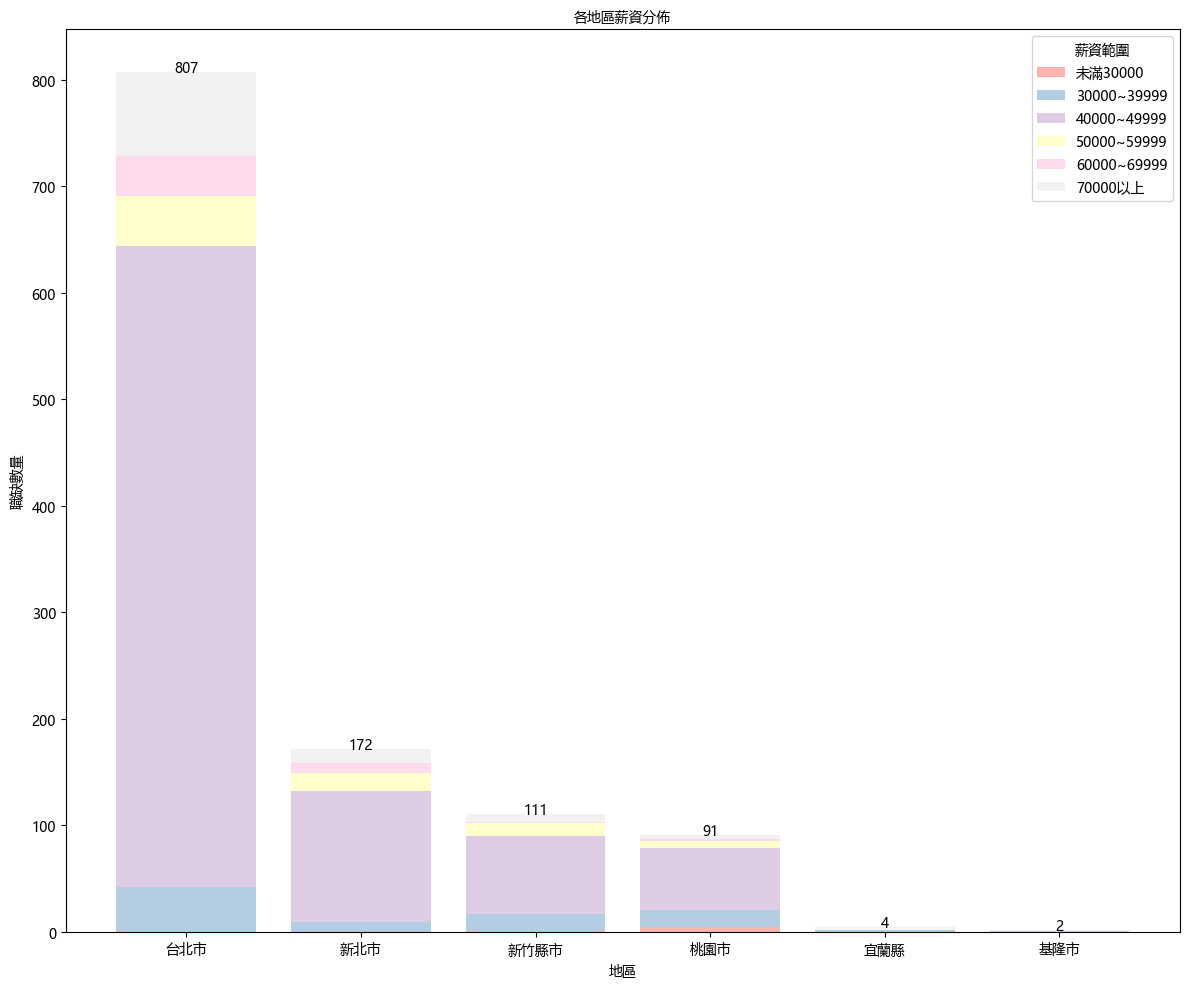

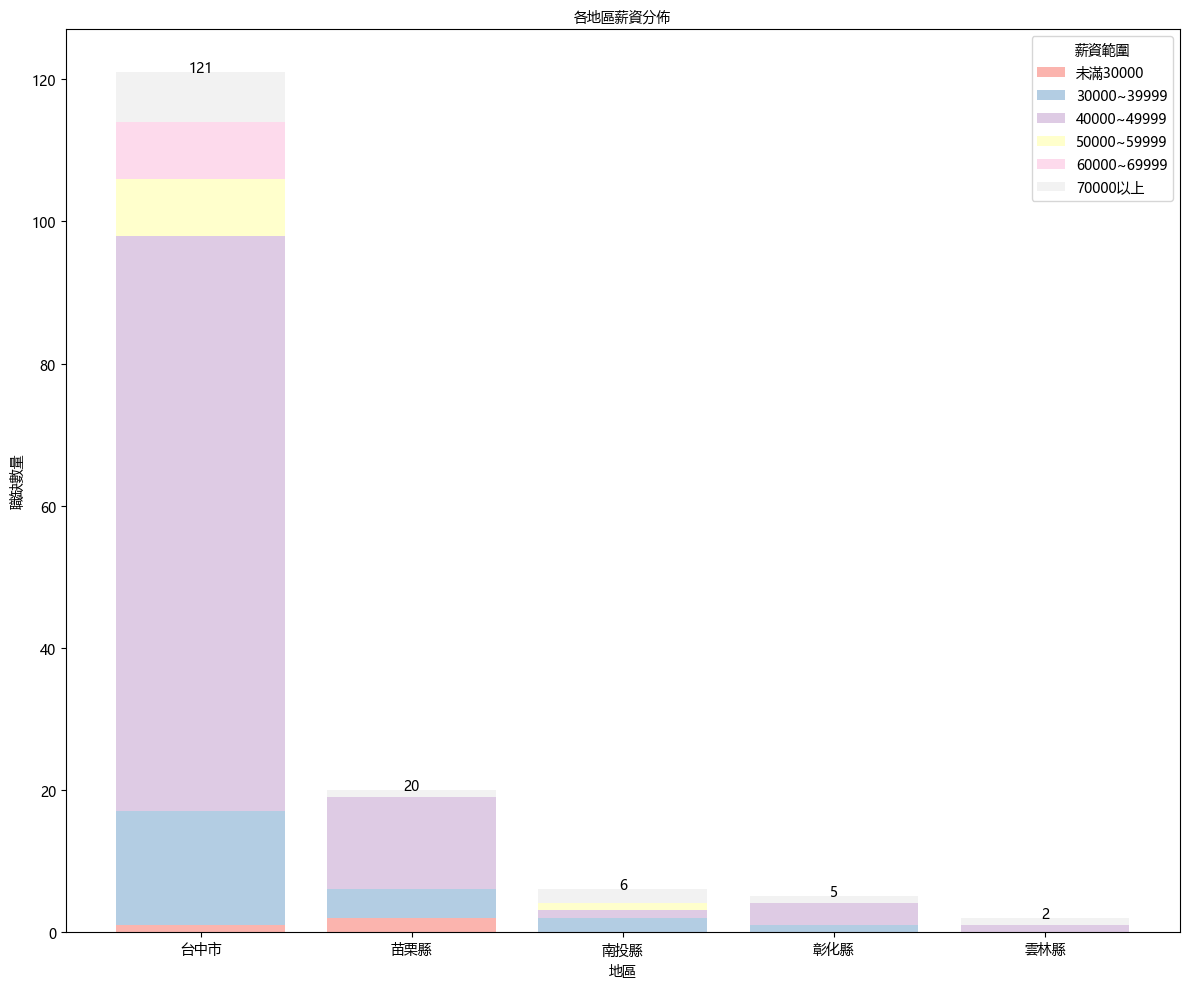

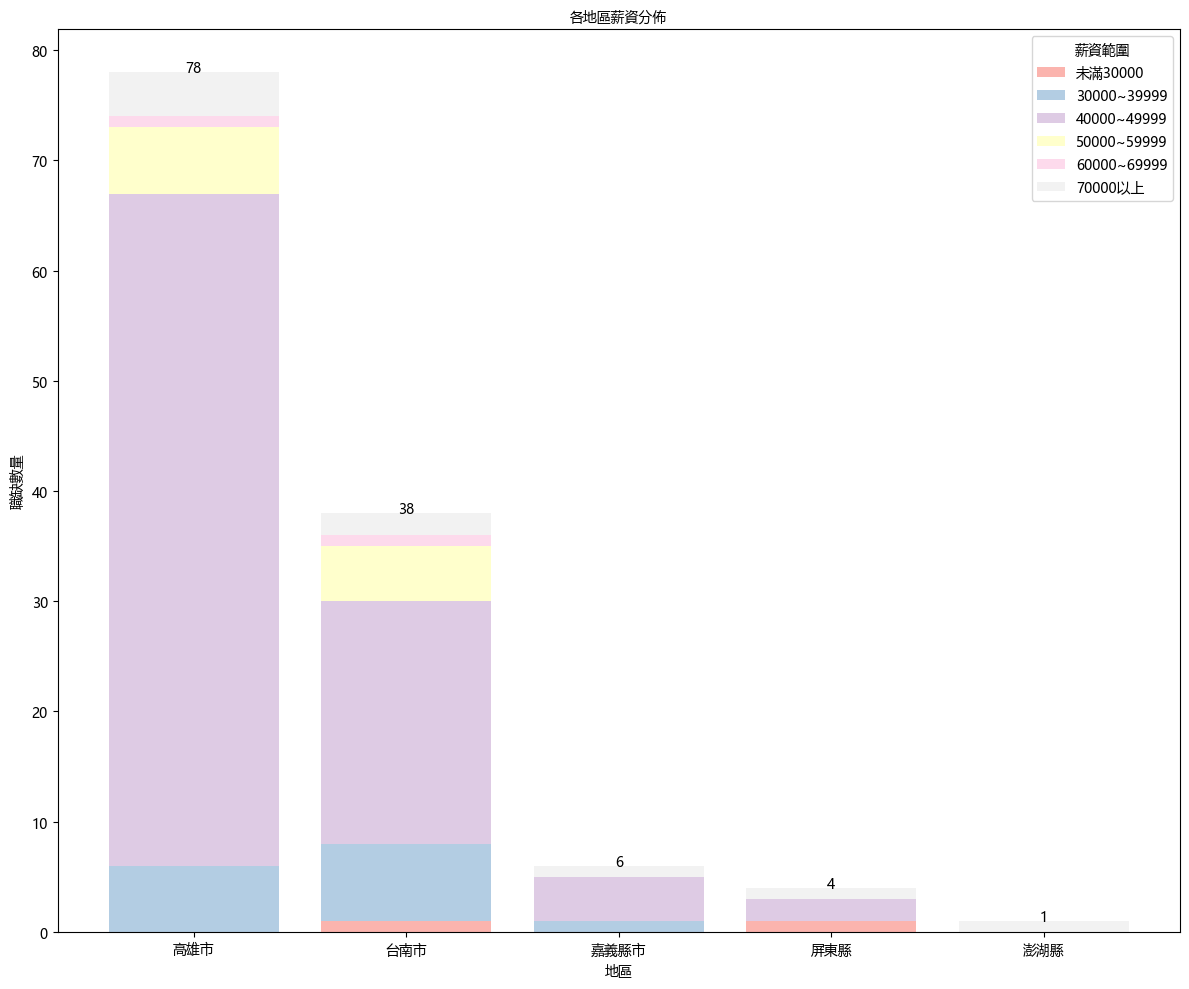

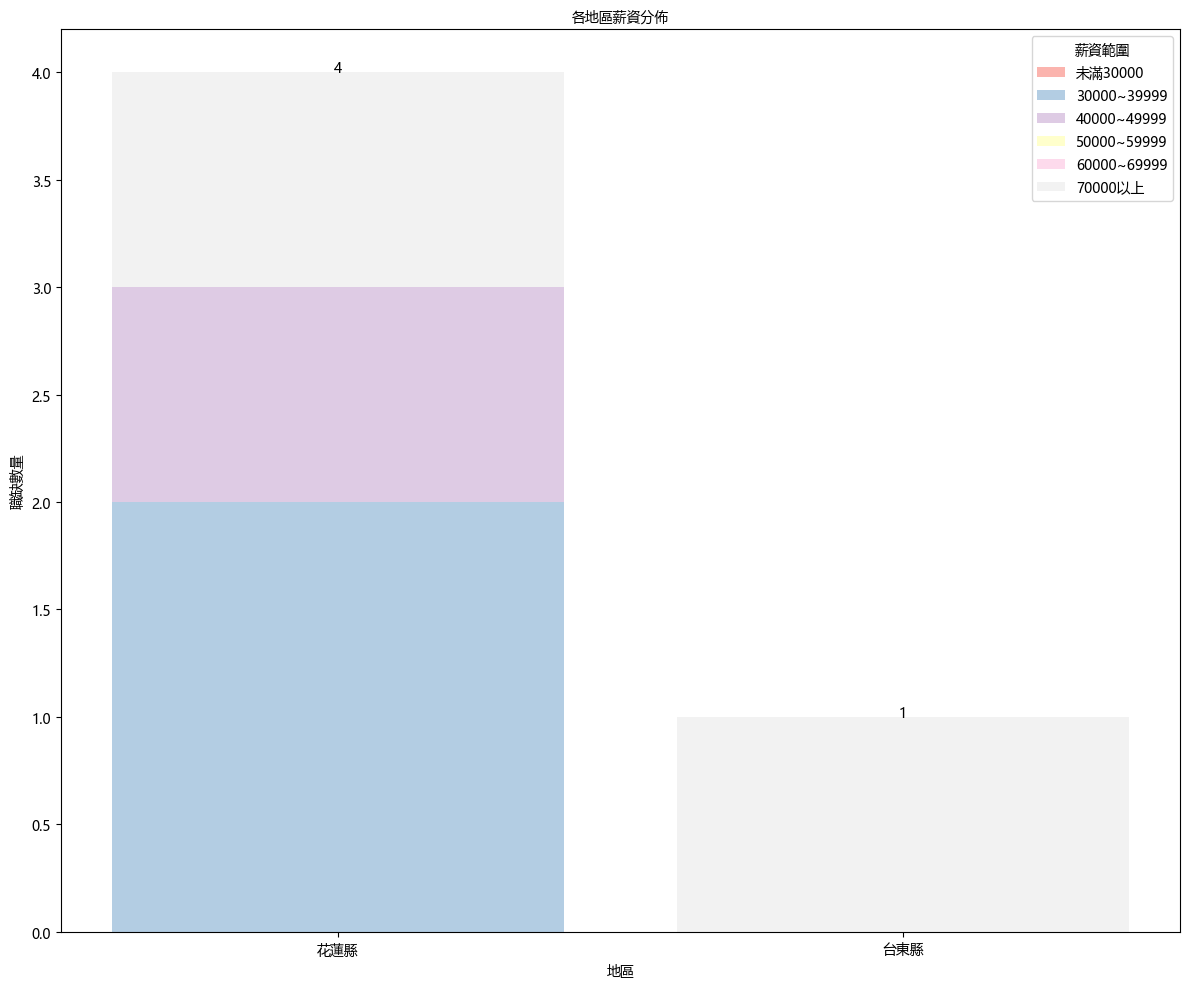

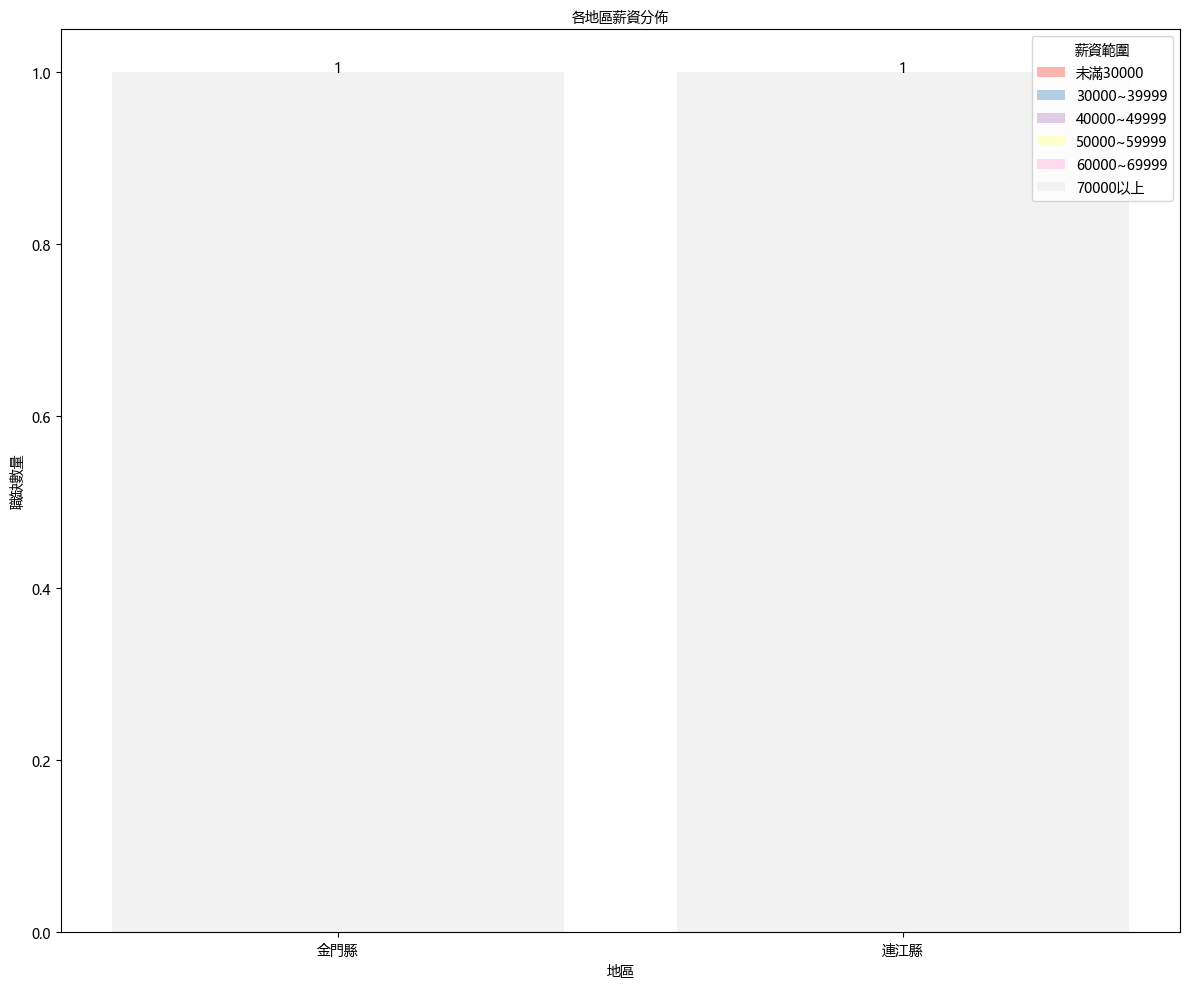

In [11]:
# 按地區資料視覺化
plot_salary_distribution(salary_dict, north_cities)
plot_salary_distribution(salary_dict, central_cities)
plot_salary_distribution(salary_dict, south_cities)
plot_salary_distribution(salary_dict, east_cities)
plot_salary_distribution(salary_dict, Fujian_cities)

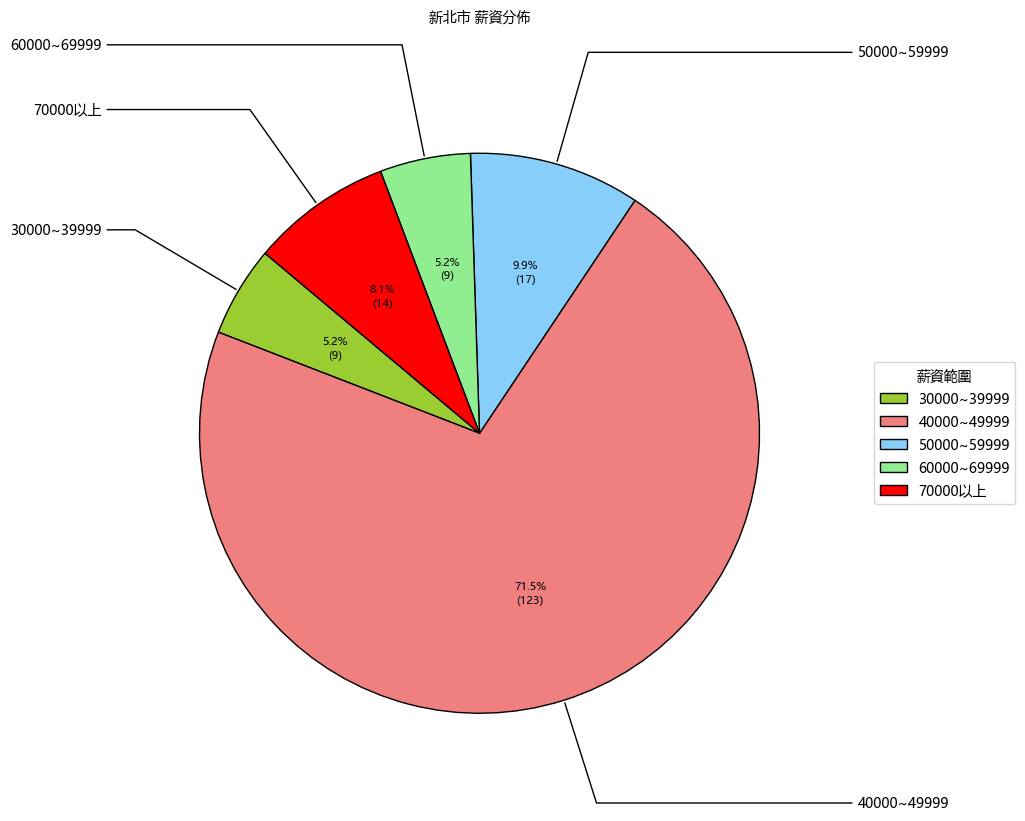

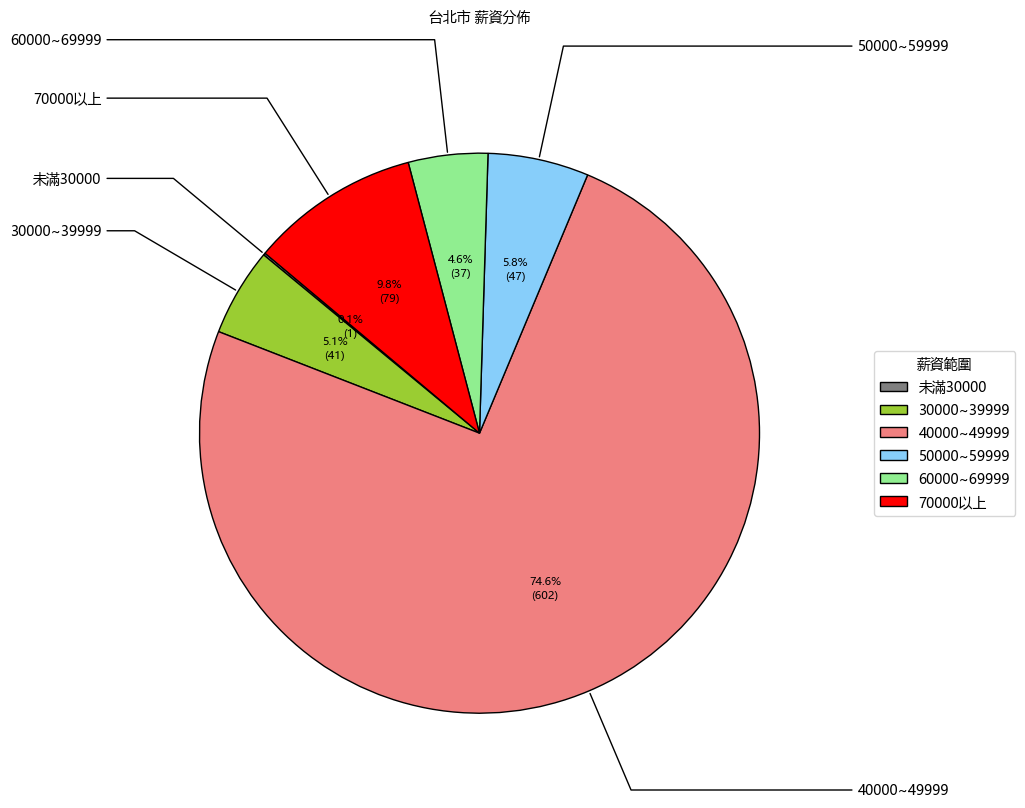

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 設置字體
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 微軟雅黑
font_prop = fm.FontProperties(fname=font_path)

# 定義顏色字典
color_dict = {
    '未滿30000': 'gray',
    '30000~39999': 'yellowgreen',
    '40000~49999': 'lightcoral',
    '50000~59999': 'lightskyblue',
    '60000~69999': 'lightgreen',
    '70000以上': 'red'
}

def autopct_format(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

def plot_salary_distribution_pie(salary_dict, location):
    # 提取指定地區的薪資數據
    salary_data = salary_dict[location]
    labels = [label for label, size in salary_data.items() if size > 0]
    sizes = [size for size in salary_data.values() if size > 0]
    
    # 根據標籤獲取對應的顏色
    colors = [color_dict[label] for label in labels]
    explode = (0,) * len(sizes)  # 不突出顯示任何一塊

    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        sizes, explode=explode, colors=colors,
        autopct=lambda pct: autopct_format(pct, sizes), startangle=140, textprops={'fontproperties': font_prop},
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, shadow=False
    )
    
    # 添加指向標籤的線
    for i, (pct, wedge) in enumerate(zip(autotexts, wedges)):
        ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        plt.annotate(
            labels[i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
            horizontalalignment=horizontalalignment, fontproperties=font_prop,
            arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='black')
        )
    
    # 調整數字位置
    for autotext in autotexts:
        autotext.set_fontproperties(font_prop)
        autotext.set_color('black')
        autotext.set_size(8)
        autotext.set_weight('bold')

    if len(colors) >= 3:
        pad = 75
    else:
        pad = 20

    # 添加圖例
    plt.legend(wedges, labels, title="薪資範圍", loc="center left", bbox_to_anchor=(1, 0.5), prop=font_prop)

    plt.title(f'{location} 薪資分佈', fontproperties=font_prop, pad=pad)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# 繪製薪資分佈圓餅圖
plot_salary_distribution_pie(salary_dict, '新北市')
plot_salary_distribution_pie(salary_dict, '台北市')

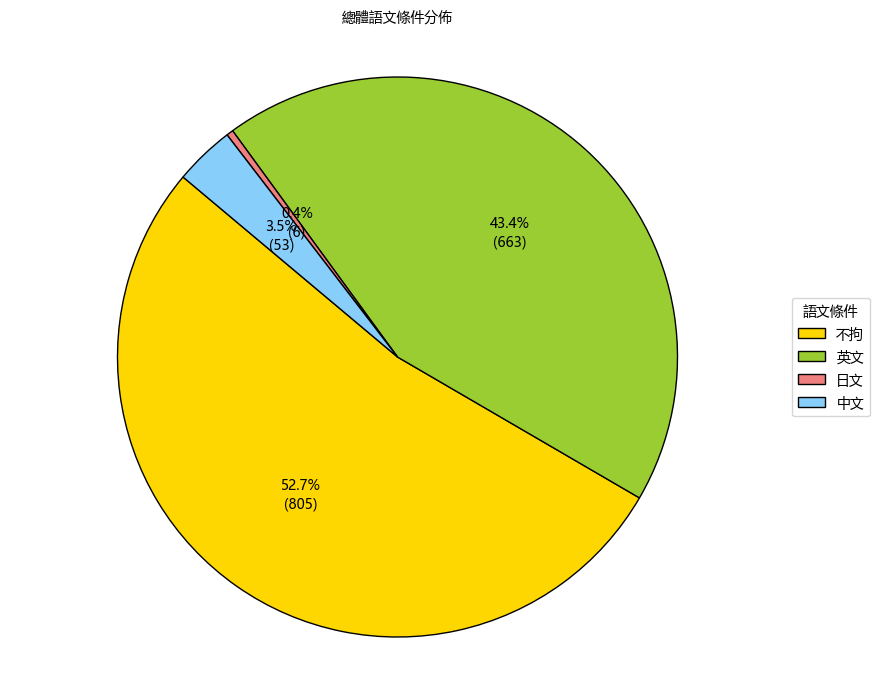

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 設置字體
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 微軟雅黑
font_prop = fm.FontProperties(fname=font_path)

def calculate_total_language_distribution(language_counts_dict):
    total_counts = {}
    for loc in language_counts_dict.keys():
        for l, counts in language_counts_dict[loc].items():
            if l not in total_counts:
                total_counts[l] = 0
            total_counts[l] += counts
    return total_counts

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        absolute = int(round(pct/100.*total))
        return f"{pct:.1f}%\n({absolute:d})"
    return my_format

def plot_total_language_pie(language_counts_dict):
    total_language_counts = calculate_total_language_distribution(language_counts_dict)
    labels = total_language_counts.keys()
    sizes = total_language_counts.values()
    
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
    explode = (0,) * len(sizes)

    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        sizes, explode=explode, colors=colors[:len(sizes)],
        autopct=autopct_format(list(sizes)), startangle=140, textprops={'fontproperties': font_prop},
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, shadow=False
    )
    
    plt.title('總體語文條件分佈', fontproperties=font_prop, pad=20)
    plt.axis('equal')
    plt.legend(wedges, labels, title="語文條件", loc="center left", bbox_to_anchor=(1, 0.5), prop=font_prop)
    plt.show()

plot_total_language_pie(language_counts_dict)


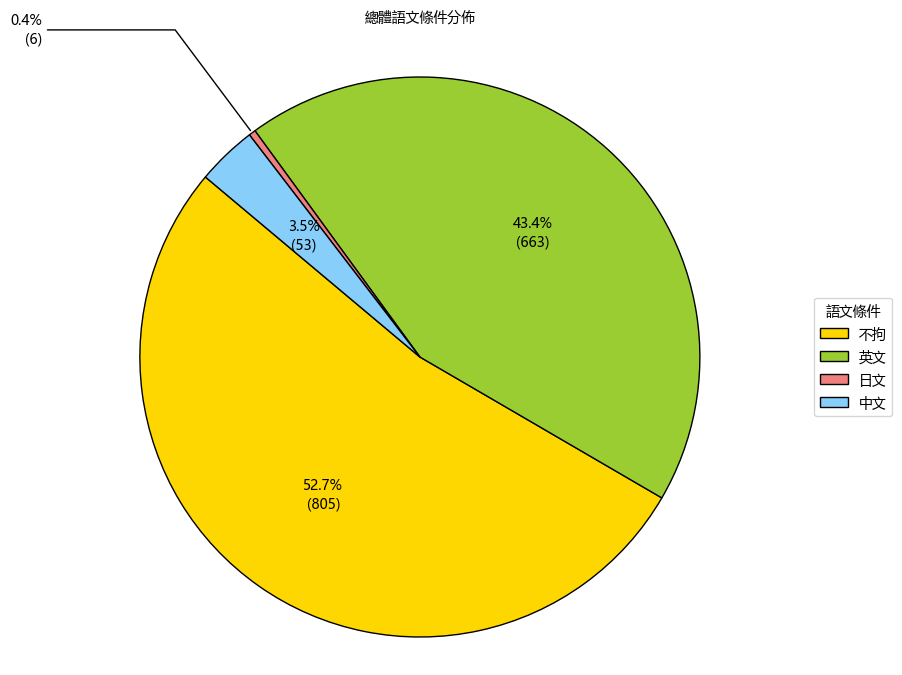

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 設置字體
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 微軟雅黑
font_prop = fm.FontProperties(fname=font_path)

def calculate_total_language_distribution(language_counts_dict):
    total_counts = {}
    for loc in language_counts_dict.keys():
        for l, counts in language_counts_dict[loc].items():
            if l not in total_counts:
                total_counts[l] = 0
            total_counts[l] += counts
    return total_counts

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        absolute = int(round(pct / 100. * total))
        if pct < 3:
            return ''
        return f"{pct:.1f}%\n({absolute:d})"
    return my_format

def plot_total_language_pie(language_counts_dict):
    total_language_counts = calculate_total_language_distribution(language_counts_dict)
    labels = list(total_language_counts.keys())
    sizes = list(total_language_counts.values())
    
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
    explode = (0,) * len(sizes)

    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        sizes, explode=explode, colors=colors[:len(sizes)],
        autopct=autopct_format(sizes), startangle=140, textprops={'fontproperties': font_prop},
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, shadow=False
    )

    # 添加標線顯示小於3%的部分
    for i, (pct, wedge) in enumerate(zip(autotexts, wedges)):
        ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        if sizes[i] / sum(sizes) < 0.03:
            plt.annotate(
                f"{sizes[i] / sum(sizes) * 100:.1f}%\n({sizes[i]:d})",
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, fontproperties=font_prop,
                arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='black')
            )
    
    plt.title('總體語文條件分佈', fontproperties=font_prop, pad=20)
    plt.axis('equal')
    plt.legend(wedges, labels, title="語文條件", loc="center left", bbox_to_anchor=(1, 0.5), prop=font_prop)
    plt.show()

plot_total_language_pie(language_counts_dict)


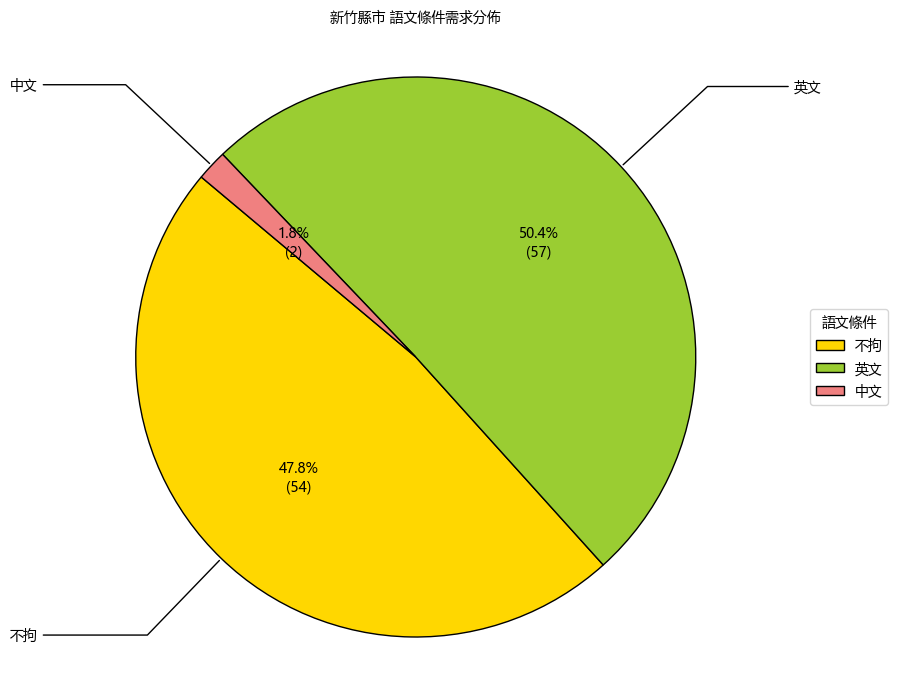

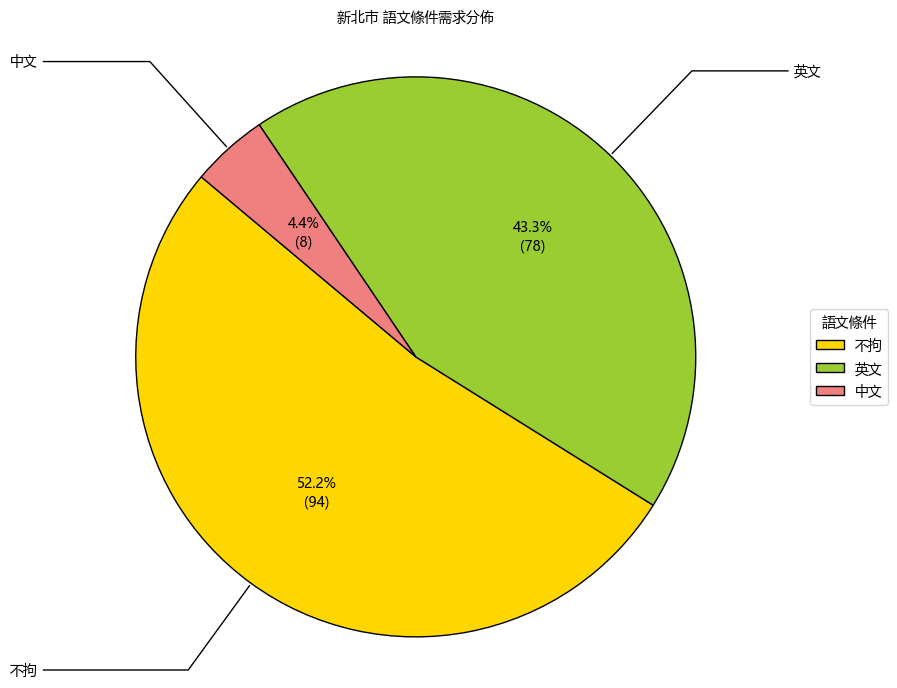

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設置字體
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 微軟雅黑
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 自定義autopct格式
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        absolute = int(round(pct/100.*total))
        return f"{pct:.1f}%\n({absolute:d})"
    return my_format

def plot_region_language_pie(language_counts_dict, location):
    language_data = language_counts_dict[location]
    
    # 獲取不拘和具體語言數據
    labels = []
    sizes = []
    if '不拘' in language_data:
        labels.append('不拘')
        sizes.append(language_data['不拘'])
    
    for lang, counts in language_data.items():
        if lang != '不拘':
            labels.append(lang)
            sizes.append(counts)
    # print(labels)
    # print(sizes)
    
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
    explode = (0,) * len(sizes)

    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        sizes, explode=explode, colors=colors[:len(sizes)],
        autopct=autopct_format(sizes), startangle=140, textprops={'fontproperties': font_prop},
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, shadow=False
    )
    
    # 添加指向標籤的線
    for i, (pct, wedge) in enumerate(zip(autotexts, wedges)):
        ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        plt.annotate(
            labels[i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
            horizontalalignment=horizontalalignment, fontproperties=font_prop,
            arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='black')
        )
    
    plt.title(f'{location} 語文條件需求分佈', fontproperties=font_prop, pad=20)
    plt.axis('equal')
    plt.legend(wedges, labels, title="語文條件", loc="center left", bbox_to_anchor=(1, 0.5), prop=font_prop)
    plt.show()

# 示例：繪製某個地區的語文條件需求分佈圓餅圖
plot_region_language_pie(language_counts_dict, '新竹縣市')
plot_region_language_pie(language_counts_dict, '新北市')


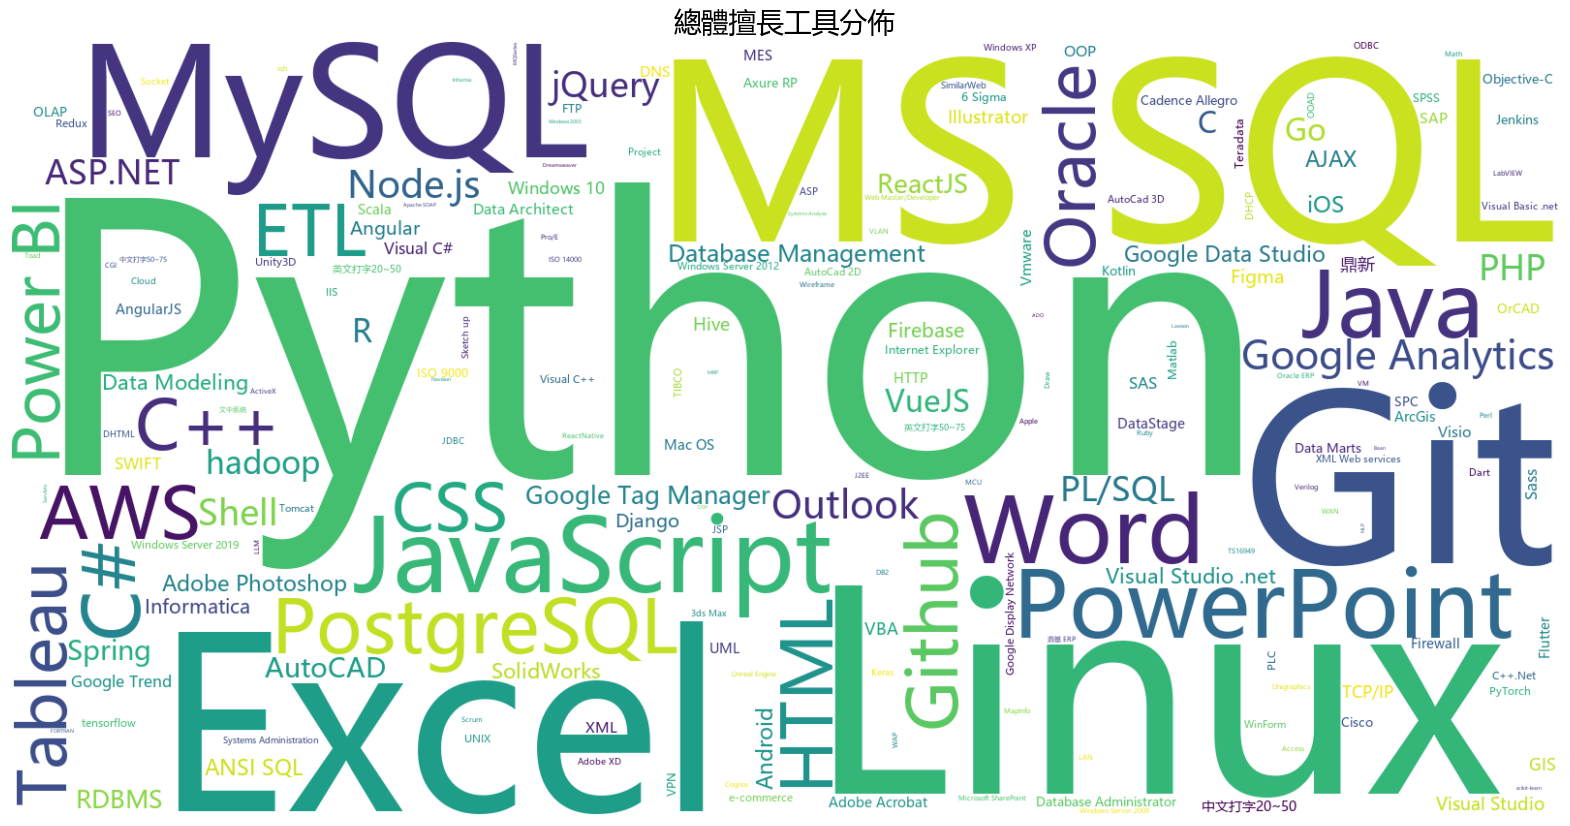

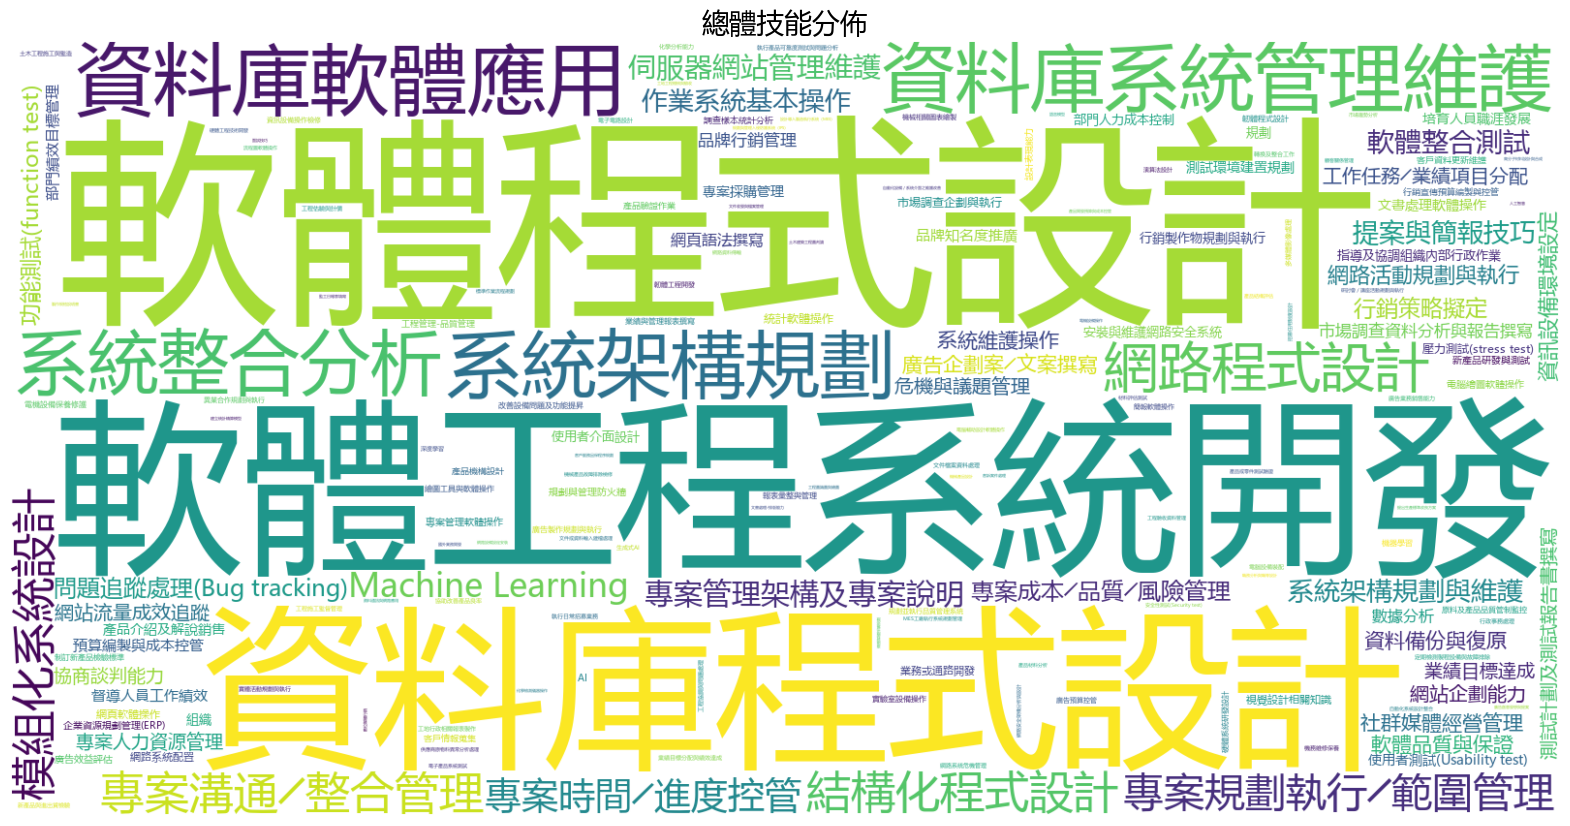

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設置字體
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 微軟雅黑

def generate_wordcloud(data_dict, title):
    wordcloud = WordCloud(font_path=font_path, width=1600, height=800, background_color='white').generate_from_frequencies(data_dict)
    
    plt.figure(figsize=(20, 16))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontproperties=fm.FontProperties(fname=font_path, size=20))
    plt.axis('off')
    plt.show()

# 將所有地區的工具數據匯總
total_tools = {}
for loc, tools in tools_dict.items():
    for tool, count in tools.items():
        if tool not in total_tools:
            total_tools[tool] = 0
        total_tools[tool] += count

# 將所有地區的技能數據匯總
total_skills = {}
for loc, skills in skills_dict.items():
    for skill, count in skills.items():
        if skill not in total_skills:
            total_skills[skill] = 0
        total_skills[skill] += count

# 繪製擅長工具詞雲圖
generate_wordcloud(total_tools, '總體擅長工具分佈')

# 繪製技能詞雲圖
generate_wordcloud(total_skills, '總體技能分佈')
